## lab5

### 实验目标

1. 学习`DeepSNAP`的简单使用
2. 使用 `PyTorch Geometric` 和 `DeepSNAP` 来实现一个用于异构图节点属性预测（节点分类）的 `GNN` 模型。

### 实验说明

1. 需要大家完成的任务是加粗且带有得分的题目，如 `问题 i：XXXXXXX（15分）`
2. 做完实验后，请举手通知助教检查实验代码以及问题的输出结果，以便给同学们进行打分
3. 如果大家有疑问尽量在实验课的前60分钟提出，后30分钟主要用于检查同学们的实验结果，可能时间没那么充裕

### 实验过程

（1）安装必要依赖包

如果电脑支持CUDA，可以使用GPU实现
- pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
- pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
- pip install torch-geometric
- pip install -q git+https://github.com/snap-stanford/deepsnap.git
- pip install -U -q PyDrive

如果大家想用CPU实现
torch-sparse和torch-scatter的安装，请参考文章：https://blog.csdn.net/dream__1/article/details/122433061

deepsnap的安装使用命令pip install deepsnap

#### `DeepSNAP` 基础知识

`DeepSNAP` 是一个用于在图上高效进行深度学习的 Python 库。

1. `DeepSNAP` 易于在训练期间/之前用于复杂的图操作，如特征计算、预训练、子图提取等。
2. 在大多数框架中，node、edge、link、graph级别任务的标准化流程留给用户自行编码。`DeepSNAP`提供了这样的标准化流程，大大节省了工作量，并使模型之间的比较更加公平。
3. 许多现实世界的图都是异构图，`DeepSNAP` 提供了高效且灵活的异构图操作，支持节点和边的异构性。

#### 将 `NetworkX` 图转换为 `DeepSNAP` 支持的格式

在 `DeepSNAP` 中，有三个级别的属性。节点级别的属性，包括 `node_feature` 和 `node_label` 。其他两个级别的属性是图和边属性。它们的用法与节点级别类似，只是特征变为 `edge_feature` 或 `graph_feature` ，标签变为 `edge_label` 或 `graph_label` 等。

`DeepSNAP` 通过包含以下图属性特征扩展了其传统的图表示，以包括异构图：

1. `node_feature` ：每个节点的特征（ `torch.tensor` ）
2. `edge_feature` : 每条边的特征（ `torch.tensor` ）
3. `node_label` : 每个节点的标签（ `int` ）
4. `node_type` : 每个节点的节点类型（ `string` ）
5. `edge_type` : 每条边的边类型（ `string` ）

其中添加的关键新特性是 `node_type` 和 `edge_type` ，这使得我们能够执行异构消息传递。

对于这个问题，我们将使用 `karate club network`进行演示。首先，由于图中的每个节点属于两个俱乐部之一（"Mr. Hi"俱乐部或"Officer"俱乐部），我们将俱乐部视为 `node_type` 。下面的代码演示了如何在 `NetworkX` 图中区分节点。


In [29]:
import torch
print(torch.__version__)
print(torch.version.cuda)

2.7.0+cu126
12.6


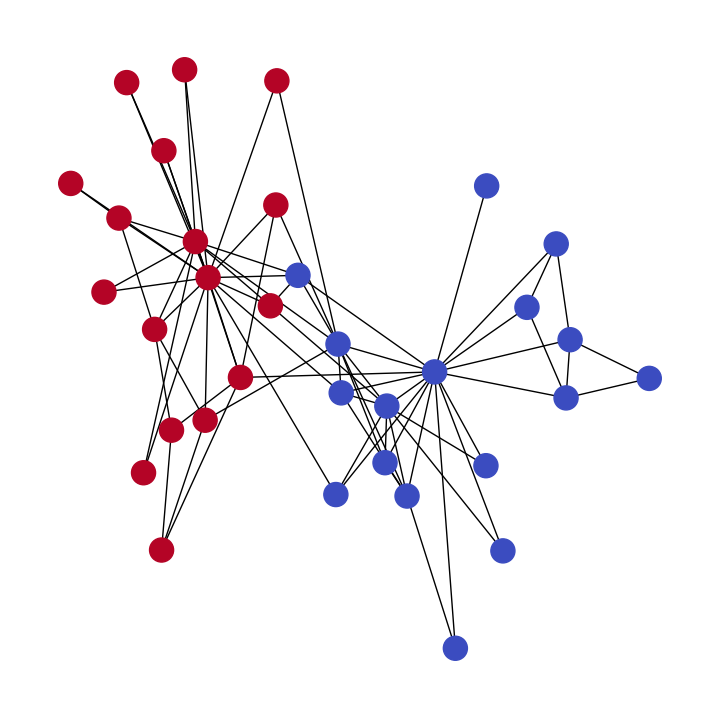

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import copy

from pylab import show
G = nx.karate_club_graph()
community_map = {}
for node in G.nodes(data=True):
    if node[1]["club"] == "Mr. Hi":
        community_map[node[0]] = 0
    else:
        community_map[node[0]] = 1
node_color = []
color_map = {0: 0, 1: 1}
node_color = [color_map[community_map[node]] for node in G.nodes()]
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color)
show()

**（2）问题1：分配 node_type 和 node_feature（30分）**

任务描述：

1. 使用上述的 `community_map` 字典和图 `G` ，向图 G 添加节点属性 `node_type` 和 `node_label` 。具体来说，对于 `node_type` ，将“Mr. Hi”俱乐部的节点分配到节点类型 `n0` ，将“Officer”俱乐部的节点分配到节点类型 `n1` 。注意：节点类型应是一个 `string` 属性。
2. 然后，对于 `node_label` ，将“Mr. Hi”俱乐部的节点分配到 `node_label` `0` ，将“Officer”俱乐部的节点分配到 `node_label` 的 `1` 。
3. 最后，将每个节点分配张量特征向量 [1,1,1,1,1] 。
4. 提示：查看` NetworkX `函数 `nx.classes.function.set_node_attributes` 。


In [31]:
def assign_node_types(G, community_map):
  # TODO: 实现此函数 (10分)

  ############# code here ############
  node_types = {}
  for node, comm in community_map.items():
    node_types[node] = 'n0' if comm == 0 else 'n1'
  nx.set_node_attributes(G, node_types, 'node_type')
  ####################################

def assign_node_labels(G, community_map):
  # TODO: 实现此函数 (10分)

  ############# code here ############
  node_labels = {}
  for node, comm in community_map.items():
    node_labels[node] = comm
  nx.set_node_attributes(G, node_labels, 'node_label')
  ####################################

def assign_node_features(G):
  # TODO: 实现此函数 (10分)

  ############# code here ############
  new_map = {node: [1., 1., 1., 1., 1.] for node in community_map}
  nx.classes.function.set_node_attributes(G, new_map, 'node_feature')
  ####################################

assign_node_types(G, community_map)
assign_node_labels(G, community_map)
assign_node_features(G)

# Explore node properties for the node with id: 20
node_id = 20
print (f"Node {node_id} has properties:", G.nodes(data=True)[node_id])


Node 20 has properties: {'club': 'Officer', 'node_type': 'n1', 'node_label': 1, 'node_feature': [1.0, 1.0, 1.0, 1.0, 1.0]}


**(3) 问题2：分配 edge_type（20分）**

任务描述：分配三个不同的 `edge_types`

- 俱乐部 "Mr. Hi" 内的边： `e0`
- 俱乐部 "Officer" 内的边： `e1`
- 两个俱乐部之间的边： `e2`
- 提示：使用之前的 `community_map` 和 `nx.classes.function.set_edge_attributes`


In [32]:
def assign_edge_types(G, community_map):
  # TODO: 实现此函数

  ############# code here ############
  edge_types = {}
  for u, v in G.edges():
    if community_map[u] == 0 and community_map[v] == 0:
      edge_types[(u, v)] = 'e0'
    elif community_map[u] == 1 and community_map[v] == 1:
      edge_types[(u, v)] = 'e1'
    else:
      edge_types[(u, v)] = 'e2'
  nx.set_edge_attributes(G, edge_types, 'edge_type')
  ####################################


assign_edge_types(G, community_map)

# Explore edge properties for a sampled edge and check the corresponding
# node types
edge_idx = 15
n1 = 0
n2 = 31
edge = list(G.edges(data=True))[edge_idx]
print (f"Edge ({edge[0]}, {edge[1]}) has properties:", edge[2])
print (f"Node {n1} has properties:", G.nodes(data=True)[n1])
print (f"Node {n2} has properties:", G.nodes(data=True)[n2])


Edge (0, 31) has properties: {'weight': 2, 'edge_type': 'e2'}
Node 0 has properties: {'club': 'Mr. Hi', 'node_type': 'n0', 'node_label': 0, 'node_feature': [1.0, 1.0, 1.0, 1.0, 1.0]}
Node 31 has properties: {'club': 'Officer', 'node_type': 'n1', 'node_label': 1, 'node_feature': [1.0, 1.0, 1.0, 1.0, 1.0]}


(4) 异构图可视化

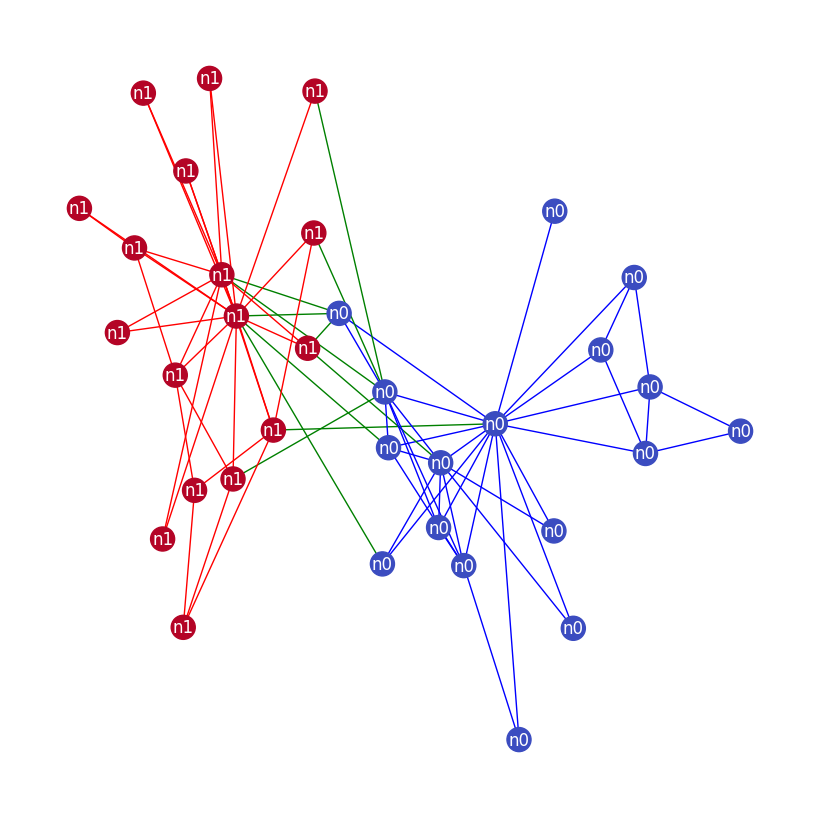

In [33]:
edge_color = {}
for edge in G.edges():
    n1, n2 = edge
    edge_color[edge] = community_map[n1] if community_map[n1] == community_map[n2] else 2
    if community_map[n1] == community_map[n2] and community_map[n1] == 0:
        edge_color[edge] = 'blue'
    elif community_map[n1] == community_map[n2] and community_map[n1] == 1:
        edge_color[edge] = 'red'
    else:
        edge_color[edge] = 'green'

G_orig = copy.deepcopy(G)
nx.classes.function.set_edge_attributes(G, edge_color, name='color')
colors = nx.get_edge_attributes(G,'color').values()
labels = nx.get_node_attributes(G, 'node_type')
plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, edge_color=colors, labels=labels, font_color='white')
show()

(5) 转换为 `DeepSNAP` 表示

In [34]:
# 把 NetworkX 对象 G 转换为 deepsnap.hetero_graph.HeteroGraph
from deepsnap.hetero_graph import HeteroGraph

hete = HeteroGraph(G_orig)

**（6）问题3： 每种类型的节点有多少个（15 分）**

In [35]:
def get_nodes_per_type(hete):
  # TODO: 实现此函数

  num_nodes_n0 = 0
  num_nodes_n1 = 0
  ############# code here #############
  num_nodes_n0 = hete.num_nodes('n0')
  num_nodes_n1 = hete.num_nodes('n1')
  #####################################

  return num_nodes_n0, num_nodes_n1

num_nodes_n0, num_nodes_n1 = get_nodes_per_type(hete)
print("Node type n0 has {} nodes".format(num_nodes_n0))
print("Node type n1 has {} nodes".format(num_nodes_n1))


Node type n0 has 17 nodes
Node type n1 has 17 nodes


**（7）问题4： 每种消息类型有多少条边？（15分）**

In [36]:
def get_num_message_edges(hete):
  # TODO: 实现此函数，其中message_type_edges的元素是一个元组(message_type, num_edge)

  message_type_edges = []

  ############# code here ############
  ## (~2 line of code)
  counts = hete.num_edges()
  message_type_edges = [(transition[1], count) for transition, count in counts.items()]
  ####################################
  return message_type_edges

message_type_edges = get_num_message_edges(hete)
for (message_type, num_edges) in message_type_edges:
    print("Message type {} has {} edges".format(message_type, num_edges))


Message type e0 has 35 edges
Message type e2 has 11 edges
Message type e1 has 32 edges


**（8）问题5： 每个数据集拆分中有多少个节点？（20分）**

> `DeepSNAP` 内置了异构图的数据集创建和分割方法。在这里，我们将为节点预测任务创建训练、验证和测试数据集，并检查生成的子图。具体来说，编写一个函数来计算每个数据集拆分中具有已知标签的节点数量。


In [37]:
from deepsnap.dataset import GraphDataset

def compute_dataset_split_counts(datasets):
  # TODO: 实现此函数，返回一个字典：将数据集名称映射到该数据集中用于监督的标注的节点数量。

  data_set_splits = {}

  ############# code here ############
  for name, ds in datasets.items():
    count = 0
    for node_type, node_idx in ds[0].node_label_index.items():
      count += node_idx.shape[0]
    data_set_splits[name] = count
  ####################################
  return data_set_splits


dataset = GraphDataset([hete], task='node')
# Splitting the dataset
dataset_train, dataset_val, dataset_test = dataset.split(transductive=True, split_ratio=[0.4, 0.3, 0.3])
datasets = {'train': dataset_train, 'val': dataset_val, 'test': dataset_test}

data_set_splits = compute_dataset_split_counts(datasets)
for dataset_name, num_nodes in data_set_splits.items():
    print("{} dataset has {} nodes".format(dataset_name, num_nodes))


train dataset has 12 nodes
val dataset has 10 nodes
test dataset has 12 nodes


（9） `DeepSNAP` 数据集可视化

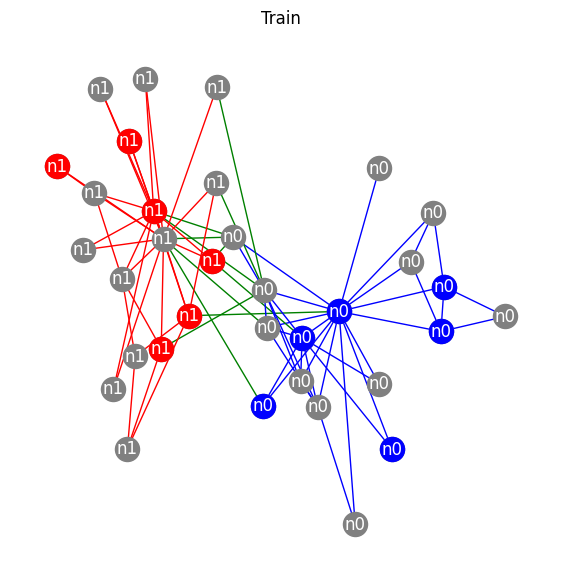

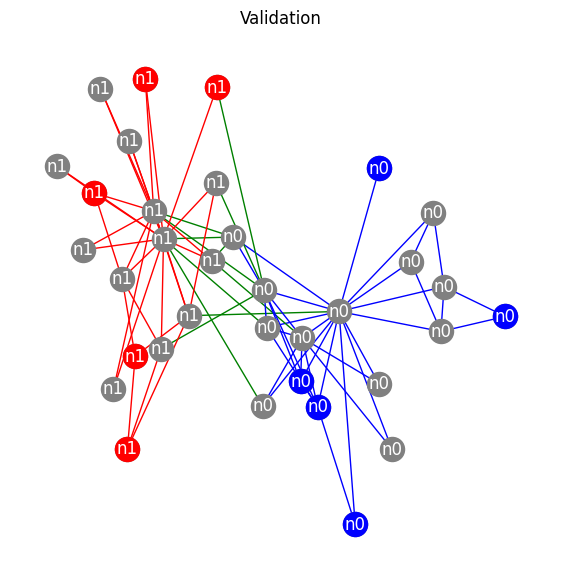

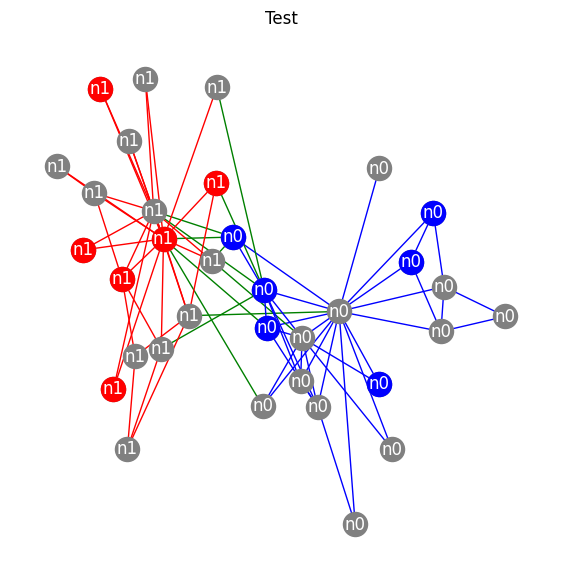

In [38]:
dataset = GraphDataset([hete], task='node')
# Splitting the dataset
dataset_train, dataset_val, dataset_test = dataset.split(transductive=True, split_ratio=[0.4, 0.3, 0.3])
titles = ['Train', 'Validation', 'Test']

for i, dataset in enumerate([dataset_train, dataset_val, dataset_test]):
    n0 = hete._convert_to_graph_index(dataset[0].node_label_index['n0'], 'n0').tolist()
    n1 = hete._convert_to_graph_index(dataset[0].node_label_index['n1'], 'n1').tolist()

    plt.figure(figsize=(7, 7))
    plt.title(titles[i])
    nx.draw(G_orig, pos=pos, node_color="grey", edge_color=colors, labels=labels, font_color='white')
    nx.draw_networkx_nodes(G_orig.subgraph(n0), pos=pos, node_color="blue")
    nx.draw_networkx_nodes(G_orig.subgraph(n1), pos=pos, node_color="red")
    show()